# Explore word co-occurence counts

This notebook explores the raw word co-occurence counts from a corpus. Background material for this notebook can be found in https://web.stanford.edu/~jurafsky/slp3/15.pdf. 

The notebook loads a pre-computed word co-occurence matrix and vocabulary and some some initial exploration e.g. look at word count statistics. 

Note that the word co-occurence matrix, `counts` is a scipy sparse matrix which which works a little differently than numpy matrices -- for further documentaiton see https://docs.scipy.org/doc/scipy/reference/sparse.html.

## data

The github repo comes with a small data set (from a random sample of 1000 court cases). You can download larger data files from https://drive.google.com/open?id=0B40b05f-8LWtVGsybWw4OTVyV00 then place them in the data/ folder.

In [2]:
import numpy as np
import heapq
import matplotlib.pyplot as plt


# import local code files
import sys, os
sys.path.append(os.getcwd() + '/code/')

from save import load_vocabulary, load_matrix
from explore_counts_fun import top_counts_bar_plot

%matplotlib inline

/Users/iaincarmichael/anaconda/lib/python2.7/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


**load word co-occurence matrix and vocabulary**

- `co_counts` is scipy sparse matrix (see https://docs.scipy.org/doc/scipy/reference/sparse.html).
- `w2i` is a dictionary mappting words to a unique index matching the rows of `counts`
- `i2w` is a list mapping indices to words
- `word_counts` is a dict displaying the number of times each word each word appears

In [3]:
w2i, i2w = load_vocabulary('data/vocab_small_ex.txt')
co_counts = load_matrix('data/co_counts_small_ex')
word_counts = np.load('data/word_counts_small_ex.npy')

# uncomment this code if you have the larger data file
# w2i, i2w = load_vocabulary('data/vocab_10000.txt')
# co_counts = load_matrix('data/co_counts_10000')
# word_counts = np.load('data/word_counts_10000.npy')

In [7]:
print w2i['lawyer']
print i2w[17743]

17743
lawyer


In [8]:
print co_counts[w2i['lawyers'], w2i['criminal']]

6.0


# explore word occurence counts

In [5]:
N = 20
heapq.nlargest(N, zip(word_counts, i2w)) # this piece of code finds the largest values of total_word_counts

[(1585293, 'the'),
 (846889, 'of'),
 (534164, 'to'),
 (413725, 'and'),
 (402033, 'in'),
 (323835, 'a'),
 (318659, 'that'),
 (193573, 'is'),
 (176407, 'for'),
 (165720, 'by'),
 (154519, 'it'),
 (146943, 'not'),
 (146085, 'as'),
 (144487, 'be'),
 (141372, 'was'),
 (135664, 'court'),
 (134211, 'or'),
 (109420, 'on'),
 (108606, 'this'),
 (98544, 'v')]

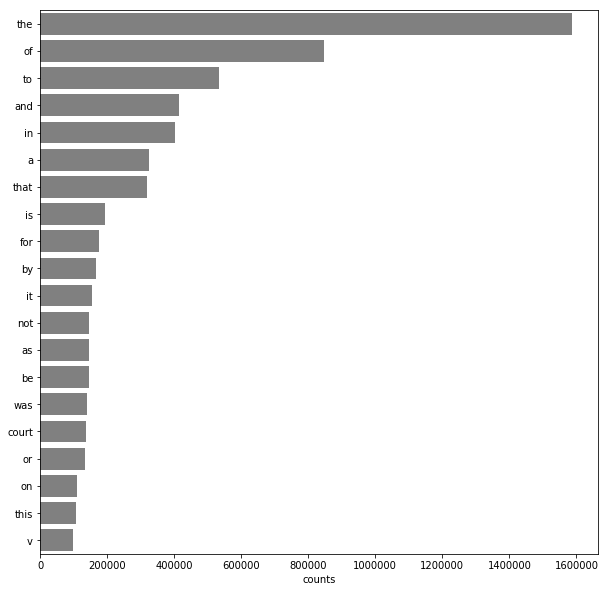

In [6]:
top_counts_bar_plot(word_counts,
                    i2w,
                    N=20,
                    title='',
                    figsize=[10, 10])

# co-occurence statistics for a single word

In [7]:
word = 'lawyer'

# vector of co-occurence counts for word
# the .toarray().reshape(-1) converts the row vector to a numpy array
word_co_counts = co_counts[w2i[word], :].toarray().reshape(-1) 

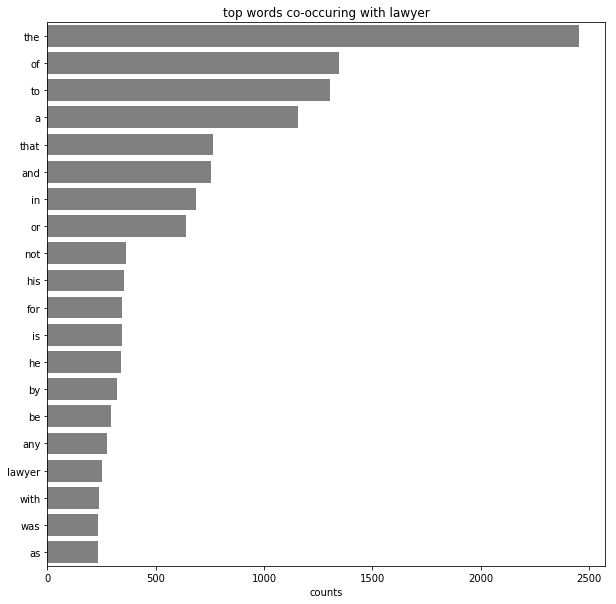

In [8]:
top_counts_bar_plot(word_co_counts,
                    i2w,
                    N=20,
                    title='top words co-occuring with %s' % word,
                    figsize=[10, 10])

In [9]:
# plt.figure(figsize=[10, 10])
# plt.hist(word_coo_counts, bins=1000)#np.arange(max(word_coo_counts)));
# plt.xlim([0, max(word_coo_counts)])
# plt.xlabel('counts')
# plt.title('histogram of co-occurence couts for all words with %s'% word)


# print 'mean: %f' % np.mean(word_coo_counts)
# print 'var: %f' % np.var(word_coo_counts)

# word similarity

Given the word co-occurence statistics, we can compute similarities between two words using a number of measures (e.g. see section 15.3 https://web.stanford.edu/~jurafsky/slp3/15.pdf). 


The code below is also in word_similarity.py.

In [10]:
def similarity(word1, word2, sim='angle'):
    """
    Computes the similarity between two words
    
    Parameters
    ----------
    word1, word2: words to compare
    sim: which similarity measure to use (angle, cosine, jaccard, dice)
    
    Returns
    -------
    similarity measure between two words
    """
    
    v1 = vec(word1)
    v2 = vec(word2)

    if sim == 'angle':
        return angle_between(v1, v2)
    elif sim == 'cosine':
        return cosine_sim(v1, v2)
    elif sim == 'jaccard':
        return jaccard_sim(v1, v2)
    elif sim == 'dice':
        return dice_sim(v1, v2)
    else:
        raise ValueError('sim must be one of: angle, cosine, jaccard, dice')

def vec(word):
    """
    Returns the vector for word as an array
    """
    return co_counts[w2i[word], :].toarray().reshape(-1)

** here are a few common similarity functions**

In [11]:
def cosine_sim(v, w):
    return np.dot(v, w) / np.sqrt(np.dot(v, v) * np.dot(w, w))

def angle_between(v, w):
    cos_angle = cosine_sim(v, w)
    angle = np.arccos(np.clip(cos_angle, -1.0, 1.0))
    return np.degrees(angle)

def jaccard_sim(v, w):
    return np.minimum(v, w).sum()/np.maximum(v, w).sum()

def dice_sim(v, w):
     return 2.0 * np.minimum(v, w).sum() /(v + w).sum()

In [12]:
word1 = 'lawyer'
word2 = 'lawyers'
print 'similarity between %s and %s' % (word1, word2)
print
print 'angle: %f' % similarity(word1, word2, sim='angle')
print 'cosine: %f' % similarity(word1, word2, sim='cosine')
print 'jaccard: %f' % similarity(word1, word2, sim='jaccard')
print 'dice: %f' % similarity(word1, word2, sim='dice')

similarity between lawyer and lawyers

angle: 18.007352
cosine: 0.951017
jaccard: 0.427718
dice: 0.599163
